In [2]:
import numpy as np
import scipy as sp

In [13]:
import plotly.express as px
import plotly.graph_objects as go

<h1><font face="Times"; size=20; color = 'navy'> Confidence Interval

<div class="alert alert-block alert-info">
    <b><font face= 'Callibri';color = 'blue'; size = 4> Definition:</font></b> <hr>
    <font face = "verdana"> A <b>confidence interval</b> is a statistical range or interval constructed around a sample statistic (such as a mean, proportion, or regression coefficient) that is used to estimate a population parameter (such as the true population mean or proportion) with a certain level of confidence. It provides a way to quantify the uncertainty associated with estimating a population parameter based on a sample of data.

Key characteristics of a confidence interval include:
<ul>
<li>Point Estimate: The sample statistic, such as the sample mean or proportion, serves as the point estimate of the population parameter.

<li>Margin of Error: The confidence interval includes a margin of error, which is a range of values that are added to and subtracted from the point estimate. This margin of error accounts for the uncertainty in the estimation process.

<li>Confidence Level: The confidence level, often expressed as a percentage (e.g., 95% or 99%), represents the probability that the calculated confidence interval contains the true population parameter. 
        </ul>
A common way to express a confidence interval is in the form of "point estimate ± margin of error."
    
</div>

$$\text{Confidence Interval} = \text{(point estimate)}  \pm  \text{(critical value)} \times \text{(standard error)}$$

# Confidence interval for a mean

A confidence interval for a mean is a range of values that is likely to contain a population mean with a certain level of confidence.

$$\text{Confidence Interval} = \bar x  \pm  z \times \frac{s}{\sqrt{n}}$$

where:

- $\bar x$: sample mean
- z: the chosen z-value
- s: sample standard deviation
- n: sample size

## With t-Distribution

- Used when n < 30

In [1]:
data = [12, 12, 13, 13, 15, 16, 17, 22, 23, 25, 26, 27, 28, 28, 29]

In [5]:
sp.stats.t.interval(confidence=0.90, df=len(data)-1, loc=np.mean(data), scale=sp.stats.sem(data))

(17.408981355522524, 23.391018644477473)

In [4]:
sp.stats.t.interval(confidence=0.95, df=len(data)-1, loc=np.mean(data), scale=sp.stats.sem(data))

(16.75776979778498, 24.042230202215016)

In [6]:
sp.stats.t.interval(confidence=0.99, df=len(data)-1, loc=np.mean(data), scale=sp.stats.sem(data))

(15.3447902793728, 25.455209720627195)

## With normal distribution

- Used when n > 30

In [7]:
np.random.seed(0)
data = np.random.randint(10, 30, 50)

In [8]:
data

array([22, 25, 10, 13, 13, 17, 19, 29, 28, 14, 16, 22, 11, 16, 17, 24, 27,
       15, 23, 18, 19, 29, 26, 29, 15, 25, 25, 10, 28, 13, 27, 29, 29, 29,
       24, 17, 10, 11, 19, 10, 20, 13, 21, 28, 12, 10, 10, 14, 15, 16])

In [10]:
sp.stats.norm.interval(confidence=0.90, loc=np.mean(data), scale=sp.stats.sem(data))

(17.695874465475686, 20.78412553452431)

In [11]:
sp.stats.norm.interval(confidence=0.95, loc=np.mean(data), scale=sp.stats.sem(data))

(17.400060940568054, 21.079939059431943)

In [12]:
sp.stats.norm.interval(confidence=0.99, loc=np.mean(data), scale=sp.stats.sem(data))

(16.821910186405187, 21.65808981359481)

# Confidence Interval for the Difference Between Means

A confidence interval (C.I.) for a difference between means is a range of values that is likely to contain the true difference between two population means with a certain level of confidence.

$$\text{Confidence Interval} = (\bar{X}_1 - \bar{X}_2) \pm t \cdot \sqrt{\frac{S_p^2}{n_1} + \frac{S_p^2}{n_2}}$$

where:

- $x_1$, $x_2$: sample 1 mean, sample 2 mean
- $t$: the t-critical value based on the confidence level and ($n_1+n_2 - 2$) degrees of freedom
- $s_p^2$: pooled variance
- $n_1$, $n_2$: sample 1 size, sample 2 size

where:

The pooled variance is calculated as: $S_p^2 = \frac{{(n_1 - 1) \cdot S_1^2 + (n_2 - 1) \cdot S_2^2}}{{n_1 + n_2 - 2}}
$

## With t-Distribution

In [31]:
group1_data = np.array([85, 88, 90, 78, 92])
group2_data = np.array([87, 84, 86, 91, 89])

mean1 = np.mean(group1_data)
mean2 = np.mean(group2_data)
std1 = np.std(group1_data, ddof=1)
std2 = np.std(group2_data, ddof=1)
n1 = len(group1_data)
n2 = len(group2_data)

confidence_level = 0.95

pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
t_critical = sp.stats.t.ppf(1 - (1 - confidence_level) / 2, df=n1 + n2 - 2)

confidence_interval = sp.stats.t.interval(confidence_level, df=n1 + n2 - 2, 
                                          loc=mean1 - mean2, scale=pooled_std * np.sqrt(1/n1 + 1/n2))

In [32]:
confidence_interval

(-7.0814807669266475, 5.481480766926625)

## With Normal Distribution

In [34]:
group1_data = np.random.randint(80, 100, 50)
group2_data = np.random.randint(80, 95, 50)

mean1 = np.mean(group1_data)
mean2 = np.mean(group2_data)
std1 = np.std(group1_data, ddof=1)
std2 = np.std(group2_data, ddof=1)
n1 = len(group1_data)
n2 = len(group2_data)

confidence_level = 0.95

pooled_std_error = np.sqrt((std1**2 / n1) + (std2**2 / n2))

z_critical = sp.stats.norm.ppf(1 - (1 - confidence_level) / 2)

margin_of_error = z_critical * pooled_std_error

confidence_interval = (mean1 - mean2 - margin_of_error, mean1 - mean2 + margin_of_error)

In [35]:
confidence_interval

(-0.8124698288723518, 3.1724698288723654)

# Confidence Interval for a Standard Deviation

The confidence interval for a standard deviation is used to estimate the range within which the true population standard deviation is likely to fall, given a sample from that population. The formula for calculating a confidence interval for a standard deviation involves the chi-square distribution. Here's the formula for a confidence interval for the population standard deviation (σ) at a certain confidence level:

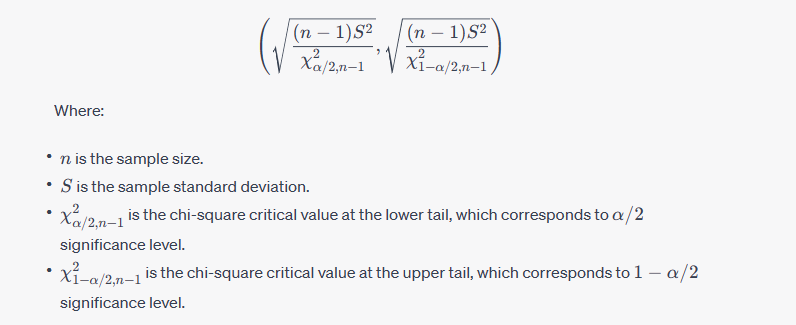

In [36]:
sample_data = np.array([85, 88, 90, 78, 92, 87, 89, 84, 86, 91])

n = len(sample_data)
sample_std = np.std(sample_data, ddof=1)
confidence_level = 0.95

alpha = 1 - confidence_level
chi2_lower = sp.stats.chi2.ppf(alpha/2, df=n-1)
chi2_upper = sp.stats.chi2.ppf(1 - alpha/2, df=n-1)

ci_lower = np.sqrt(((n - 1) * sample_std**2) / chi2_upper)
ci_upper = np.sqrt(((n - 1) * sample_std**2) / chi2_lower)

In [37]:
(ci_lower, ci_upper)

(2.8080754727613693, 7.453022360670369)

In [39]:
n = 27
sample_std = 6.43
confidence_level = 0.90

alpha = 1 - confidence_level
chi2_lower = sp.stats.chi2.ppf(alpha/2, df=n-1)
chi2_upper = sp.stats.chi2.ppf(1 - alpha/2, df=n-1)

ci_lower = np.sqrt(((n - 1) * sample_std**2) / chi2_upper)
ci_upper = np.sqrt(((n - 1) * sample_std**2) / chi2_lower)

print(f"Confidence Interval for Standard Deviation: ({ci_lower:}, {ci_upper:})")

Confidence Interval for Standard Deviation: (5.25782129378996, 8.36048337367873)


In [40]:
n = 27
sample_std = 6.43
confidence_level = 0.99

alpha = 1 - confidence_level
chi2_lower = sp.stats.chi2.ppf(alpha/2, df=n-1)
chi2_upper = sp.stats.chi2.ppf(1 - alpha/2, df=n-1)

ci_lower = np.sqrt(((n - 1) * sample_std**2) / chi2_upper)
ci_upper = np.sqrt(((n - 1) * sample_std**2) / chi2_lower)

print(f"Confidence Interval for Standard Deviation: ({ci_lower:}, {ci_upper:})")

Confidence Interval for Standard Deviation: (4.718126418976448, 9.814336181896163)


# Confidence Interval for a Correlation Coefficient

In [43]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([2.8, 3, 4.24, 5, 6.07])

confidence_level = 0.95

r = np.corrcoef(x, y)[0, 1]

z_transformed = 0.5 * np.log((1 + r) / (1 - r))

n = len(x)
std_error_z = 1 / np.sqrt(n - 3)

alpha = 1 - confidence_level
z_critical_lower = sp.stats.norm.ppf(alpha / 2)
z_critical_upper = sp.stats.norm.ppf(1 - alpha / 2)

z_lower = z_transformed - z_critical_upper * std_error_z
z_upper = z_transformed + z_critical_upper * std_error_z

lower_limit = (np.exp(2 * z_lower) - 1) / (np.exp(2 * z_lower) + 1)
upper_limit = (np.exp(2 * z_upper) - 1) / (np.exp(2 * z_upper) + 1)

print(f"Confidence Interval for Correlation Coefficient: ({lower_limit:.2f}, {upper_limit:.2f})")

Confidence Interval for Correlation Coefficient: (0.77, 1.00)
